## Implementing Decision Trees Classifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
# Creating Dependant and Independant features
X = pd.DataFrame(iris['data'], columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

Y = iris['target']

In [7]:
# Train - Test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [8]:
# Applying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier() # can use max_depth parameter to reduce overfitting

In [9]:
treeClassifier.fit(X_train, Y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.3, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.7857142857142857, 'x[2] <= 4.85\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(0.2, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.3, 0.5, 'x[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.6428571428571429, 'x[3] <= 1.7\ngini = 0.093\nsamples = 41\nvalue = [0, 2, 39]'),
 Text(0.7, 0.5, 'x[1] <= 3.05\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.6, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.5, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nval

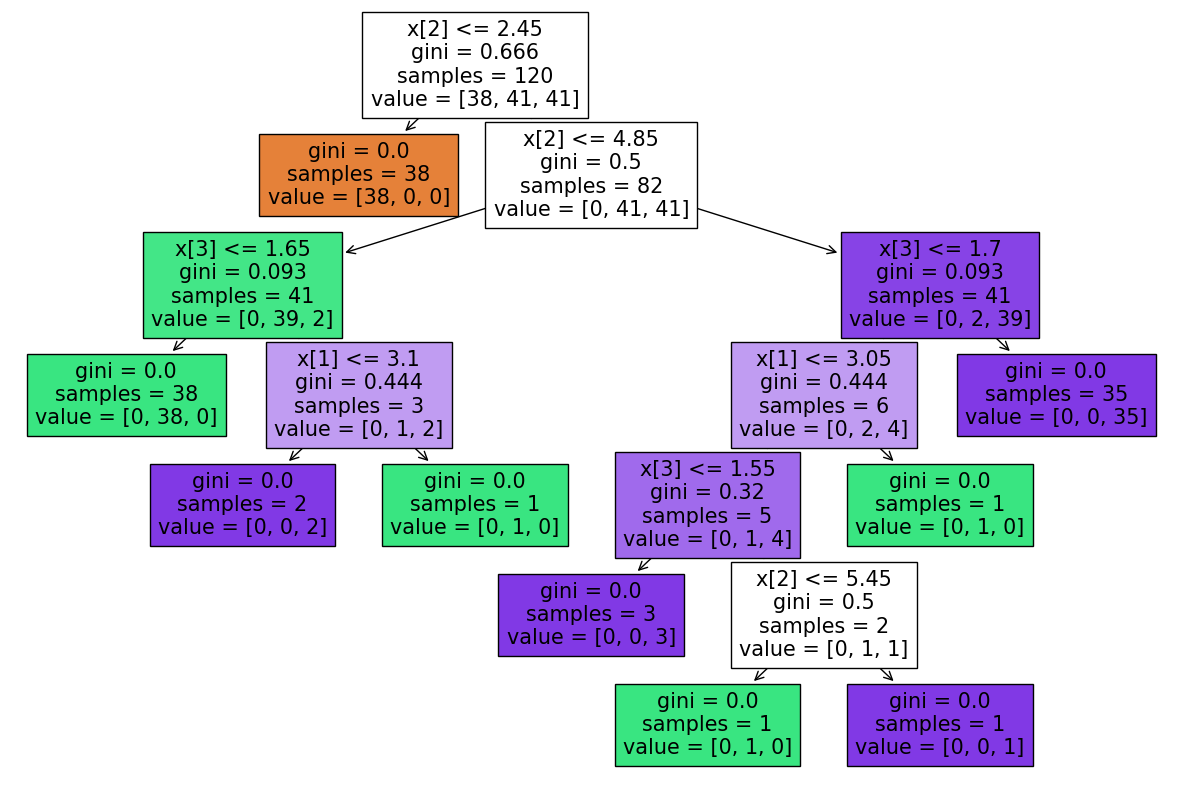

In [10]:
# Visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize = (15, 10))
tree.plot_tree(treeClassifier, filled = True)

Gini = 0 -> Pure Split <br>
Gini = 0.5 -> Impure Split

As already the tree is split well in the 3rd level, we don't need further splits as it leads to overfitting. <br>
For that we will use max_depth parameter along with the model to reduce overfitting.

In [13]:
# Predicting
Y_prediction = treeClassifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
confusion_mat = confusion_matrix(Y_test, Y_prediction)
print(confusion_mat)

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]


In [16]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



<b>Post Pruning is always good for smaller datasets.</b>

### Decision Tree Classifier Prepruning and HyperParameter Tuning

In [19]:
param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
treeModel = DecisionTreeClassifier()

In [22]:
grid = GridSearchCV(treeClassifier, param_grid = param, cv = 5, scoring = 'accuracy')

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [25]:
# Best parameters
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [26]:
grid.best_score_

0.9583333333333334

In [27]:
Y_prediciton = grid.predict(X_test)

In [28]:
confusion_mat = confusion_matrix(Y_test, Y_prediction)
print(confusion_mat)

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]


In [29]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



In [30]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(Y_test, Y_prediciton)

print("Accuracy Score is: ", acc_score)

Accuracy Score is:  0.9
